In [33]:
#libraries used
library(ggplot2)
library(coin)
library(rstatix)
library(ggmosaic)
library(FactoMineR)
library(stats)
library(lsr)
library(gridExtra)

In [ ]:
theme_set(theme_bw(base_size = 22))

## Proportion analysis

In [17]:
#read data on crossing proportions by period and by bridge or not bridge location
cross.df<-read.csv("https://raw.githubusercontent.com/norberello/gibbons-crossing-bridges/main/crossing%20counts.csv")
head(cross.df)#first line of data

,period,crossing.location
,<chr>,<chr>
1,before,bridges
2,before,bridges
3,before,bridges
4,before,bridges
5,before,bridges
6,before,bridges


Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
Please use `unite()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


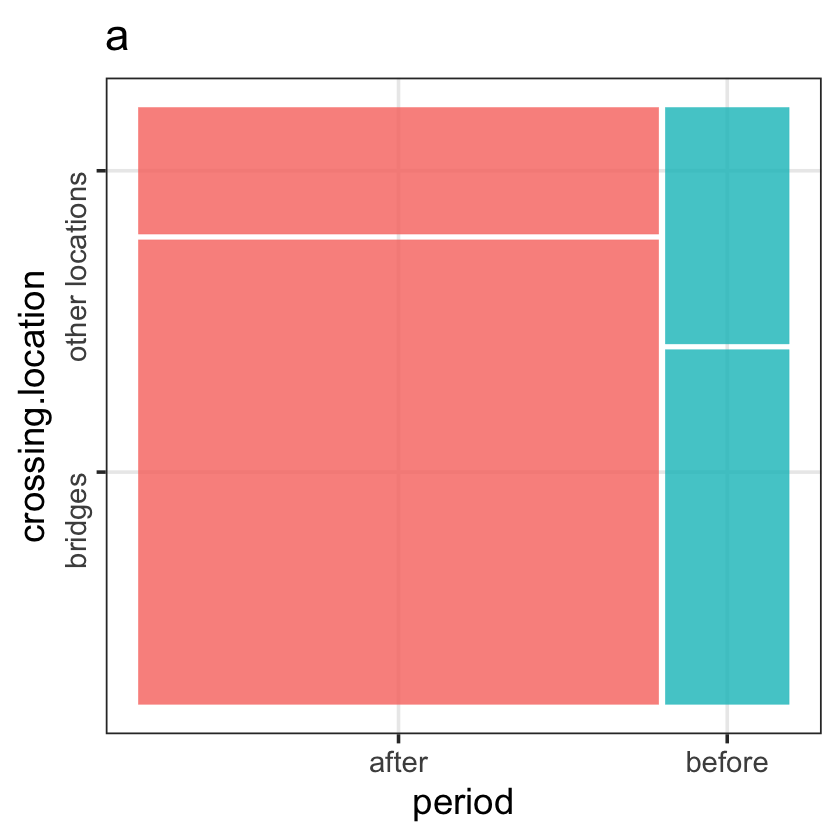

In [18]:
#mosaic plot
a<-ggplot(data=cross.df)+
   geom_mosaic(aes(x=product(crossing.location,period),fill=period))+ggtitle("a")+
  theme(legend.position = "none",axis.text.y=element_text(angle=90))
a

In [23]:
df <- data.frame("rope bridge location" = c(6, 33), "other crossing locations" = c(4, 9),
                 row.names = c("before", "after"))
df
fisher.test(df)
cramer_v(df)

,rope.bridge.location,other.crossing.locations
,<dbl>,<dbl>
before,6,4
after,33,9



	Fisher's Exact Test for Count Data

data:  df
p-value = 0.2445
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.07726623 2.45605006
sample estimates:
odds ratio 
 0.4172037 


Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”


[1] 0.1126872

## Crossing rate analysis

In [1]:
#read the crossing rate data
data<-read.csv("https://raw.githubusercontent.com/norberello/gibbons-crossing-bridges/main/crossing%20data%20info.csv")
head(data,10)#first 10 lines of data

,period,Date,crossing.rate
,<chr>,<chr>,<dbl>
1,before,03-Mar-13,0.00
2,before,29-Mar-13,1.32
3,before,08-Apr-13,0.00
4,before,11-Apr-13,0.00
5,before,08-May-13,0.00
6,before,13-May-13,0.00
7,before,20-Jun-13,0.00
8,before,15-Feb-14,0.00
9,before,24-Apr-14,1.46


In [2]:
#order period by time as factor
data$period <- factor(data$period,
                       levels = c('before','after'),ordered = TRUE)

In [3]:
#some descriptive statistics
before<-data[data$period == "before",]$crossing.rate 
after<-data[data$period == "after",] $crossing.rate
summary(before)
summary(after)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    0.87    1.39    3.56 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.180   1.298   2.260   4.740 

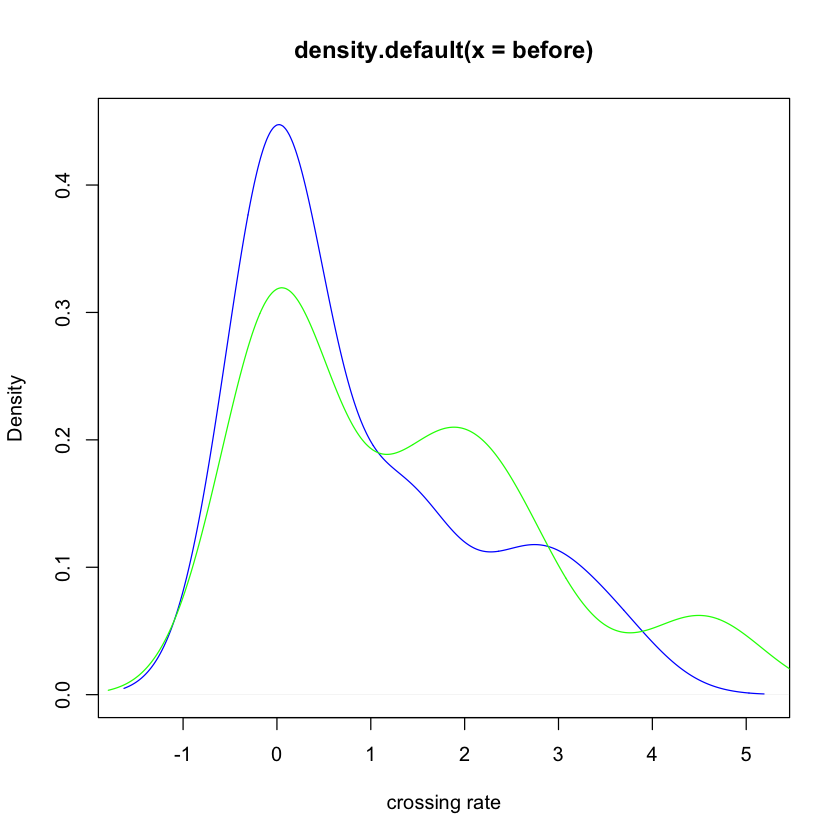

In [4]:
plot(density(before),col="blue",ylim=c(0,0.45),xlab="crossing rate")
lines(density(after),col="green")
#crossing rates are not normal, there is also a lot of overlap between groups

In [5]:
shapiro.test(before)
shapiro.test(after)


	Shapiro-Wilk normality test

data:  before
W = 0.73514, p-value = 0.0006062



	Shapiro-Wilk normality test

data:  after
W = 0.81931, p-value = 1.742e-06


Warning message:
“Removed 2 rows containing missing values (geom_segment).”


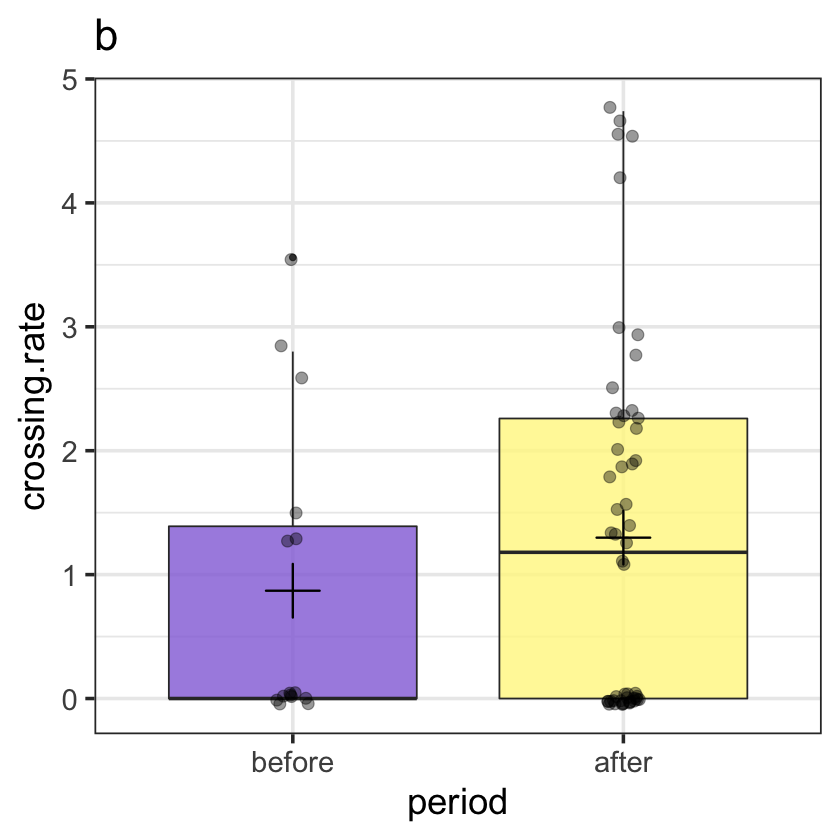

In [13]:
b<-ggplot(data,aes(period,crossing.rate))+
  geom_boxplot(fill=c("medium purple","khaki1"),
               alpha=0.8)+
  geom_jitter(width=0.05,height=0.05,size=3,
              alpha=0.4)+
  stat_summary(fun="mean",pch=3,size=2.5)+ggtitle("b")
b

In [7]:
wilcox.test(crossing.rate~period,data=data,exact=F)


	Wilcoxon rank sum test with continuity correction

data:  crossing.rate by period
W = 330, p-value = 0.3402
alternative hypothesis: true location shift is not equal to 0


In [8]:
wilcox_effsize(crossing.rate~period,data=data)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,crossing.rate,before,after,0.1174962,15,52,small


## Crossing rate analysis (only by bridges)

In [25]:
data2<-read.csv("https://raw.githubusercontent.com/norberello/gibbons-crossing-bridges/main/crossing%20data%20info%20just%20bridges.csv")
head(data2)

,period,Date,crossing.rate
,<chr>,<chr>,<dbl>
1,before,3-Mar-13,0.00
2,before,29-Mar-13,1.32
3,before,08-Apr-13,0.00
4,before,11-Apr-13,0.00
5,before,8-May-13,0.00
6,before,13-May-13,0.00


In [26]:
data2$period <- factor(data2$period,
                      levels = c('before','after'),ordered = TRUE)

In [27]:
before<-data2[data2$period == "before", ]$crossing.rate 
after<-data2[data2$period == "after", ] $crossing.rate

In [29]:
summary(before)
summary(after)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.572   1.320   1.780 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0050  0.9233  1.5375  4.1800 

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


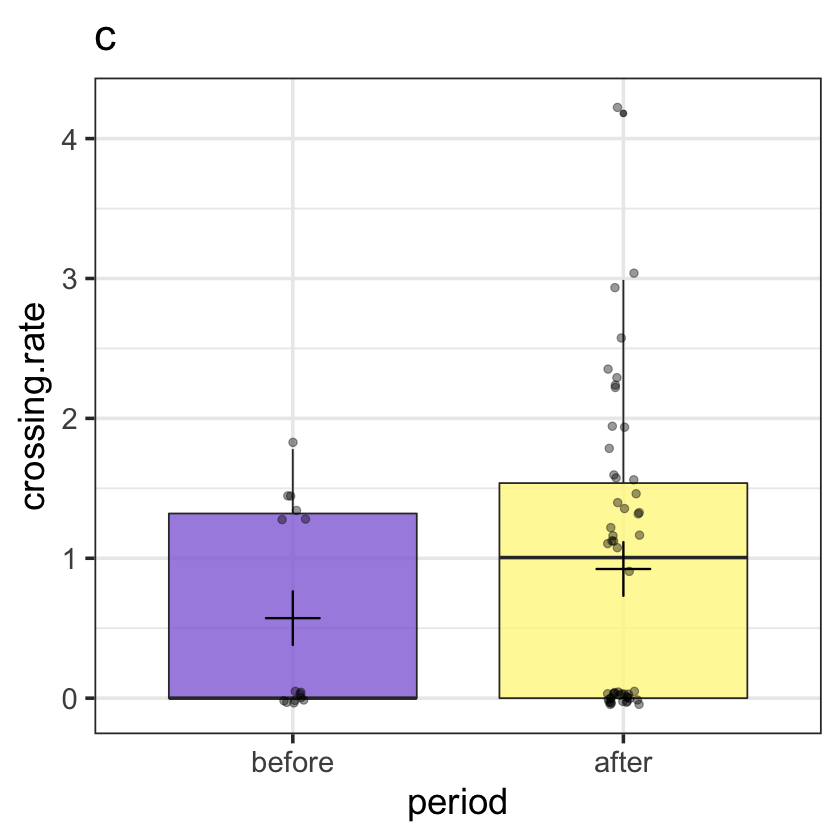

In [32]:
c<-ggplot(data2,aes(period,crossing.rate))+
  geom_boxplot(fill=c("medium purple","khaki1"),
               alpha=0.8)+
  geom_jitter(width=0.05,height=0.05,size=2,
              alpha=0.4)+
  stat_summary(fun="mean",pch=3,size=2.5)+ggtitle("c")
c

In [30]:
wilcox_effsize(crossing.rate~period,data=data)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,crossing.rate,before,after,0.1174962,15,52,small


In [31]:
wilcox.test(crossing.rate~period,data=data2,exact=T)

Warning message in wilcox.test.default(x = c(0, 1.32, 0, 0, 0, 0, 0, 0, 1.46, 1.4, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  crossing.rate by period
W = 328.5, p-value = 0.3251
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


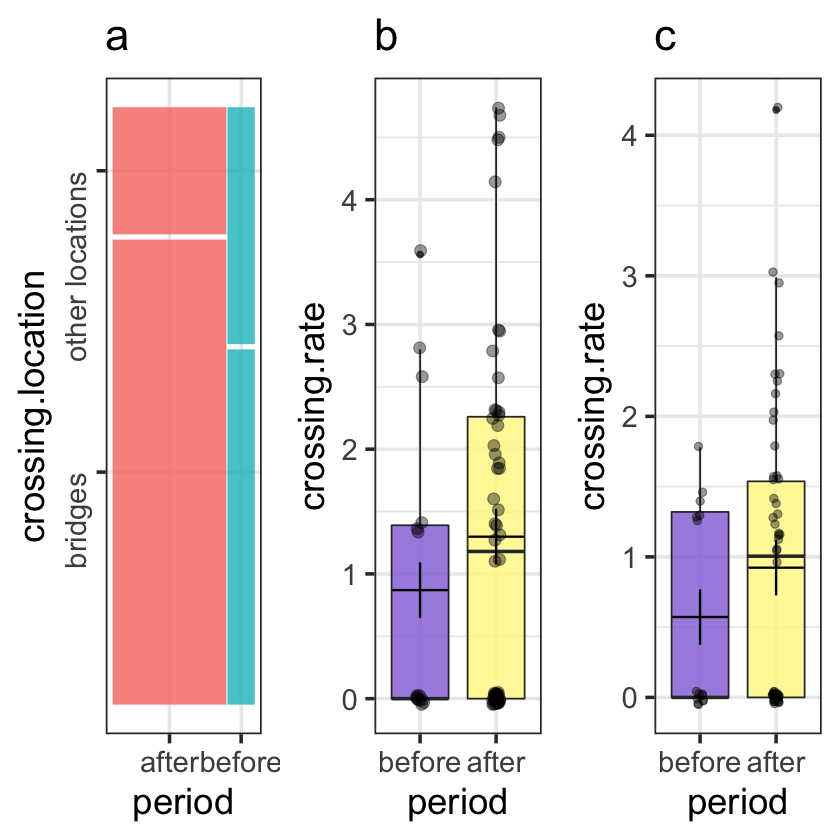

In [34]:
#tree figures together
grid.arrange(a,b,c,ncol=3)